In [26]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import community as community_louvain
from collections import defaultdict
from collections import Counter


In [3]:

def loadGraph(filename):
    G = nx.read_gexf(filename)
    return G
    

In [4]:

def plot_degree_distribution(G):
    """
    Generates and plots the degree distribution of an undirected graph.

    Parameters:
        G (networkx.Graph): The input graph.

    Returns:
        dict: A dictionary where keys are degrees and values are their frequencies.
    """
    # Get the degree of each node
    degrees = [degree for _, degree in G.degree()]

    # Count the frequency of each degree
    degree_counts = Counter(degrees)

    # Separate degrees and their frequencies for plotting
    x, y = zip(*sorted(degree_counts.items()))

    
    total_nodes = G.number_of_nodes()

    # Normalize the frequency of each degree
    y = [count / total_nodes for count in y]
    

    # Plot the degree distribution
    plt.figure(figsize=(8, 6))
    plt.bar(x, y, width=0.8, color='b', alpha=0.7, edgecolor='k')
    plt.title('Degree Distribution', fontsize=14)
    plt.xlabel('Degree', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.xticks(range(0, max(x) + 1))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # plot log-log degree distribution
    plt.figure(figsize=(8, 6))
    plt.loglog(x, y, 'bo', alpha=0.7)
    plt.title('Log-Log Degree Distribution', fontsize=14)
    plt.xlabel('Degree', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.grid(True, which="both", ls="--", alpha=0.7)
    plt.show()

    return dict(degree_counts)


In [7]:
def plot_giant_component_vs_node_removal(G, removal_strategy="random", title = "Random Failures"):
    """
    Plots the size of the giant component vs the fraction of nodes removed.

    Parameters:
        G (networkx.Graph): The input graph.
        removal_strategy (str): The strategy for node removal ('random' or 'degree').
    """
    # Make a copy of the graph
    G = G.copy()
    num_nodes = G.number_of_nodes()

    # List to store the fraction of nodes removed and size of the giant component
    fractions_removed = []
    giant_component_sizes = []

    # Generate a list of nodes to remove
    if removal_strategy == "degree":
        # Remove nodes by descending degree
        nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)
        nodes = [node for node, _ in nodes]
    elif removal_strategy == "random":
        # Remove nodes in random order
        nodes = list(G.nodes)
        random.shuffle(nodes)
    else:
        raise ValueError("Invalid removal strategy. Choose 'random' or 'degree'.")

    # Remove nodes one by one and compute the size of the giant component
    for i, node in enumerate(nodes):
        G.remove_node(node)
        largest_cc = max(nx.connected_components(G), key=len, default=[])
        fractions_removed.append((i + 1) / num_nodes)  # Fraction of nodes removed
        giant_component_sizes.append(len(largest_cc) / num_nodes )  # Size of the giant component

    # Plot the results
    plt.figure(figsize=(8, 6))
    plt.plot(fractions_removed, giant_component_sizes, label=f"Strategy: {removal_strategy}")
    plt.title(title, fontsize=14)
    plt.xlabel("Fraction of Nodes Removed", fontsize=12)
    plt.ylabel("Size of Giant Component", fontsize=12)
    plt.grid(alpha=0.7)
    plt.legend(fontsize=10)
    plt.show()


In [19]:
def detect_communities(G):
    """
    Detects communities in an undirected graph using the Louvain algorithm.

    Parameters:
        G (networkx.Graph): The input graph.

    Returns:
        dict: A dictionary where keys are nodes and values are community IDs.
    """
    # Compute the best partition (community structure)
    partition = community_louvain.best_partition(G)
    
    return partition

def plot_large_communities(G, partition):
    """
    Plots large graphs with communities in a visually clear manner.

    Parameters:
        G (networkx.Graph): The input graph.
        partition (dict): A dictionary mapping nodes to community IDs.
    """
    # Assign colors to nodes based on their community
    node_colors = [partition[node] for node in G.nodes()]

    # Use a spring layout for better spacing
    pos = nx.kamada_kawai_layout(G)  # Adjust seed for consistent layout

    plt.figure(figsize=(12, 8))
    nx.draw(
        G,
        pos,
        node_color=node_colors,
        cmap=plt.cm.tab20,
        node_size=100,  # Adjust node size
        edge_color="gray",
        alpha=0.7,  # Transparency for edges
        with_labels=False  # Hide labels for clarity
    )
    plt.title("Communities in the Network (Simplified)", fontsize=16)
    plt.show()


In [10]:
def find_all_cut_nodes_of_size_1(G : nx.Graph):
    """
    Recursively finds all cut nodes of size 1 in a graph.

    Parameters:
        G (networkx.Graph): The input graph.

    Returns:
        cut_nodes (set): Set of all cut nodes of
    """
    cut_nodes = set()
    for node in G.nodes:
        G_copy = G.copy()
        G_copy.remove_node(node)
        if not nx.is_connected(G_copy):
            cut_nodes.add(node)
    return cut_nodes


In [17]:
def plot_cut_nodes(G, cut_nodes):
    """
    Plots the cut nodes of a graph.

    Parameters:
        G (networkx.Graph): The input graph.
        cut_nodes (set): Set of cut nodes.
    """
    # Use a spring layout for better spacing
    pos = nx.kamada_kawai_layout(G)  # Adjust seed for consistent layout

    plt.figure(figsize=(12, 8))
    nx.draw(
        G,
        pos,
        node_color="tab:blue",
        node_size=100,  # Adjust node size
        edge_color="gray",
        alpha=0.7,  # Transparency for edges
        with_labels=False  # Hide labels for clarity
    )

    # Highlight the cut nodes
    nx.draw_networkx_nodes(
        G,
        pos,
        nodelist=cut_nodes,
        node_color="tab:red",
        node_size=100
    )

    plt.title("Cut Nodes in the Network", fontsize=16)
    plt.show()

In [23]:

def find_cut_edges(G):
    """
    Finds all cut edges (bridges) in the graph.

    Parameters:
        G (networkx.Graph): The input graph.

    Returns:
        list: List of tuples representing the cut edges.
    """
    return list(nx.bridges(G))

In [24]:

def plot_graph_with_cut_edges(G, cut_edges):
    """
    Plots the graph, highlighting the cut edges in red.

    Parameters:
        G (networkx.Graph): The input graph.
        cut_edges (list): List of cut edges.
    """
    pos = nx.kamada_kawai_layout(G)  # Generate layout positions for nodes

    # Draw the graph with default edge colors
    plt.figure(figsize=(10, 8))
    nx.draw(
        G,
        pos,
        with_labels=False,
        node_size=50,
        edge_color="gray",
        node_color="lightblue"
    )

    # Highlight cut edges in red
    nx.draw_networkx_edges(
        G,
        pos,
        edgelist=cut_edges,
        edge_color="red",
        width=2.5,
        label="Cut Edges"
    )

    plt.title("Graph with Cut Edges Highlighted")
    plt.legend(["Nodes", "Cut Edges"], loc="upper left")
    plt.show()

In [34]:
def calculate_knn_with_debug(G):
    """
    Calculate k_nn(k), the average degree of neighbors of nodes with degree k, with debugging output.

    Parameters:
        G (networkx.Graph): The input graph.

    Returns:
        knn (dict): A dictionary where keys are degrees (k) and values are k_nn(k).
    """
    # Get the degree of each node
    degrees = dict(G.degree())
    
    # Debugging: Print node degrees
    print("Node degrees:", degrees)
    
    # Dictionaries to store sums and counts
    degree_sum = defaultdict(int)  # Sum of neighbor degrees for nodes of degree k
    degree_count = defaultdict(int)  # Number of nodes with degree k
    
    # Iterate over all nodes
    for node in G.nodes():
        node_degree = degrees[node]  # Degree of the current node
        neighbors = list(G.neighbors(node))
        neighbor_degrees = [degrees[neighbor] for neighbor in neighbors]
        
        # Debugging: Print node and its neighbors' degrees
        # print(f"Node {node} (degree {node_degree}) -> Neighbor degrees: {neighbor_degrees}")
        
        # Update sums and counts for the current node degree
        degree_sum[node_degree] += sum(neighbor_degrees)
        degree_count[node_degree] += len(neighbors)
    
    # Calculate k_nn(k)
    knn = {}
    for k in degree_sum:
        if degree_count[k] > 0:
            knn[k] = degree_sum[k] / degree_count[k]
        else:
            knn[k] = 0
    
    # Debugging: Print intermediate results
    print("Degree sum:", dict(degree_sum))
    print("Degree count:", dict(degree_count))
    print("k_nn(k):", knn)
    
    return knn

def plot_knn(knn):
    """
    Plot k_nn(k) vs. k.

    Parameters:
        knn (dict): A dictionary where keys are degrees (k) and values are k_nn(k).
    """
    # Extract k and k_nn(k)
    k_values = sorted(knn.keys())
    knn_values = [knn[k] for k in k_values]

    # Plot the function
    plt.figure(figsize=(8, 6))
    plt.plot(k_values, knn_values, marker="o", linestyle="-", color="blue", label=r"$k_{\text{nn}}(k)$")
    # plt.xscale("log")
    # plt.yscale("log")
    plt.xlabel("Degree (k)")
    plt.ylabel(r"Average Neighbor Degree $k_{\text{nn}}(k)$")
    plt.title(r"Degree Correlation Function $k_{\text{nn}}(k)$")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.legend()
    plt.show()


In [35]:

def degree_preserving_randomization(G, num_swaps):
    """
    Perform degree-preserving randomization of an undirected graph, ensuring it remains simple
    and no edge is used more than once during a single swap.

    Parameters:
        G (networkx.Graph): The input graph.
        num_swaps (int): The number of edge swaps to perform.

    Returns:
        G_randomized (networkx.Graph): A new graph with randomized edges.
    """
    # Make a copy of the input graph to avoid modifying the original
    G_randomized = G.copy()
    swaps = 0
    attempts = 0
    max_attempts = num_swaps * 10  # To avoid infinite loops if swaps are not feasible

    while swaps < num_swaps and attempts < max_attempts:
        attempts += 1

        # Dynamically retrieve the edge list to ensure consistency
        edges = list(G_randomized.edges())
        
        # Randomly select two distinct edges (a, b) and (c, d)
        edge1, edge2 = random.sample(edges, 2)
        a, b = edge1
        c, d = edge2

        # Skip if the swap creates self-loops or duplicate edges
        if len({a, b, c, d}) < 4:  # Self-loop check
            continue
        if (a, d) in edges or (c, b) in edges:  # Duplicate edge check
            continue

        # Perform the edge swap
        G_randomized.remove_edge(a, b)
        G_randomized.remove_edge(c, d)
        G_randomized.add_edge(a, d)
        G_randomized.add_edge(c, b)

        swaps += 1

    if attempts >= max_attempts:
        print(f"Stopped after {attempts} attempts with {swaps} successful swaps.")
    else:
        print(f"Completed {swaps} swaps successfully.")

    return G_randomized

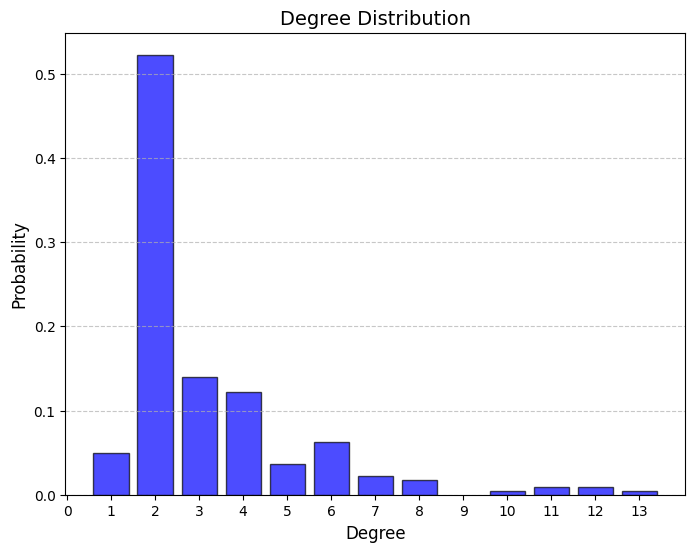

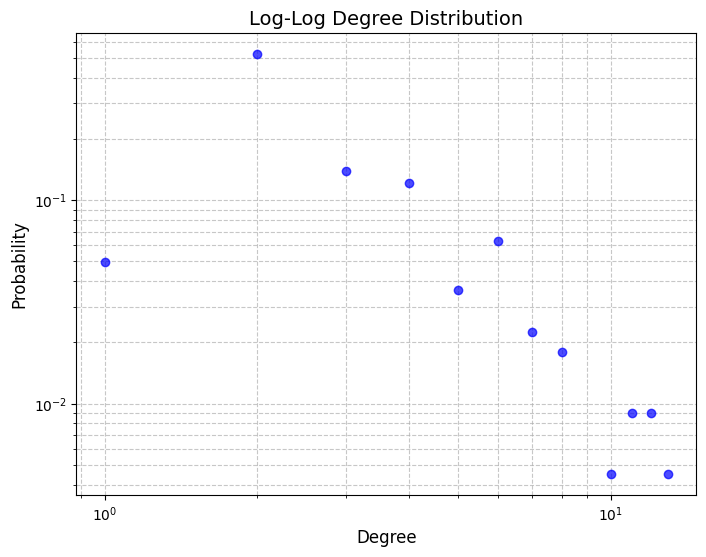

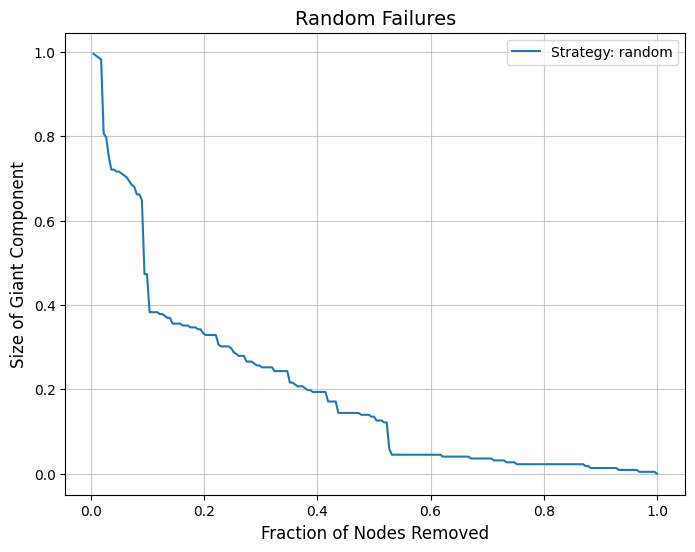

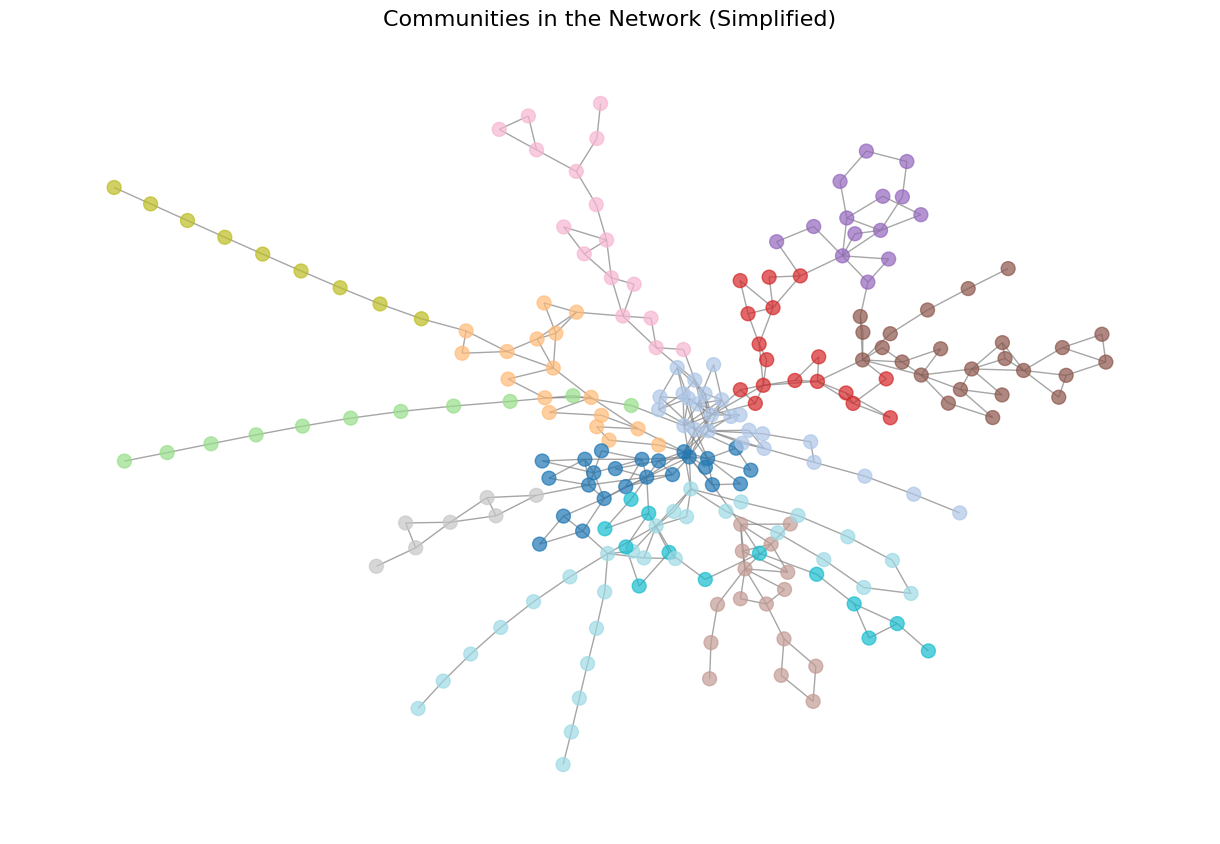

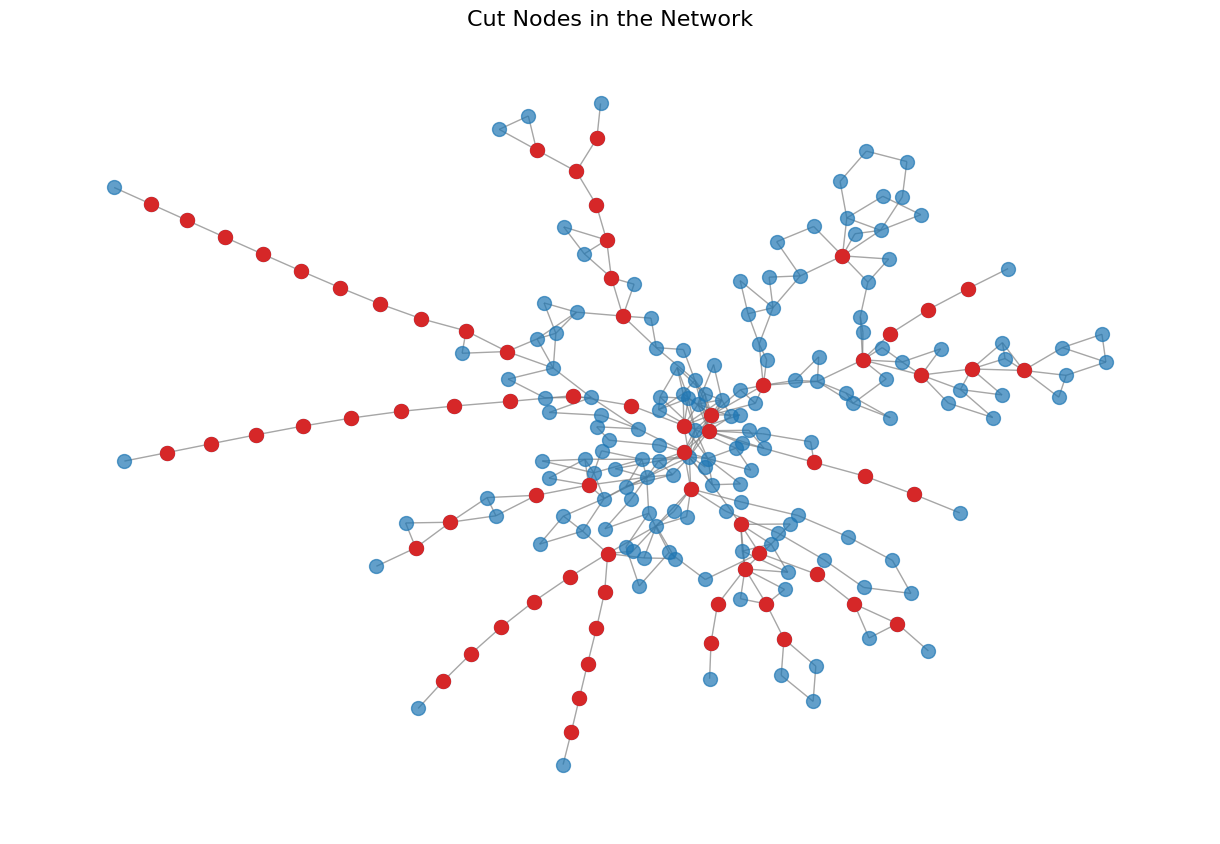

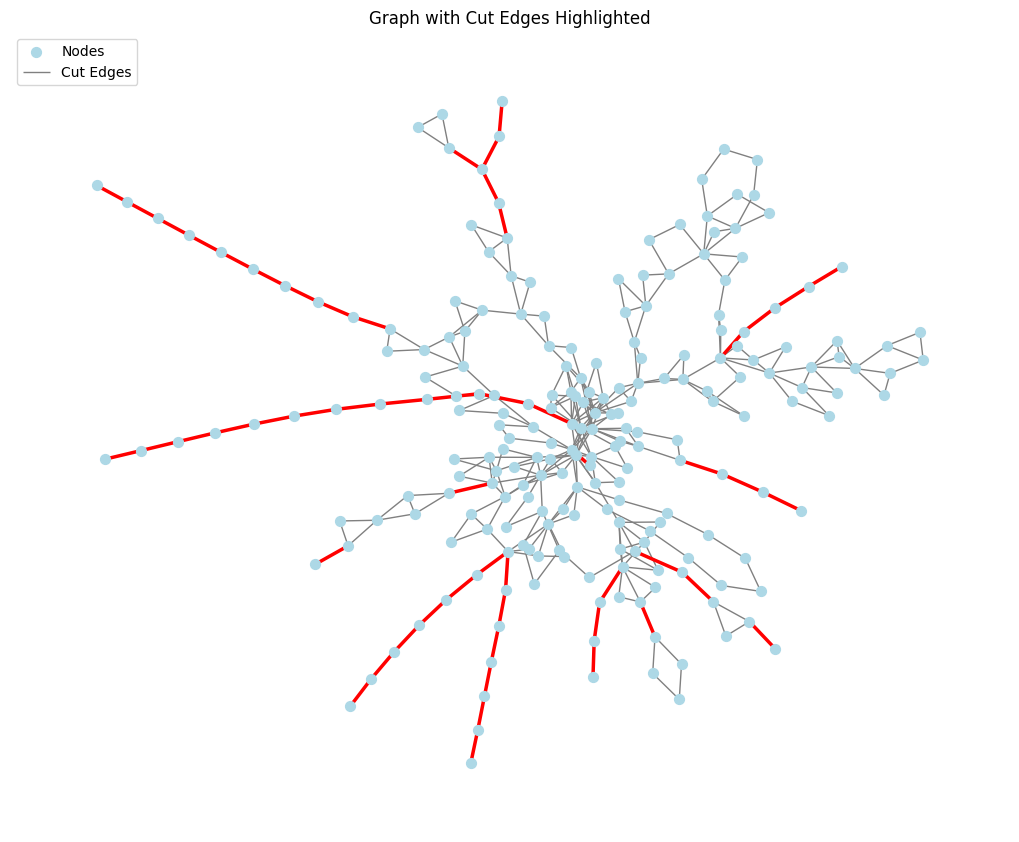

Node degrees: {'Dhaka': 12, 'Biman_Bandar': 12, 'BBSetu_E': 10, 'Chatmohar': 6, 'Natore': 13, 'Santahar': 7, 'Talora': 2, 'Bogura': 4, 'Sonatola': 3, 'Bonar_Para': 5, 'Gaibandha': 4, 'Bamondanga': 2, 'Pirgacha': 2, 'Kaunia': 7, 'Kurigram': 2, 'Rangpur': 3, 'Joypurhat': 6, 'Parbatipur': 8, 'Dinajpur': 6, 'Pirganj': 6, 'Thakurgaon_Road': 6, 'B Sirajul Islam': 3, 'Joydebpur': 8, 'Tangail': 3, 'SH M Monsur Ali': 4, 'Ullapara': 6, 'Ishwardi Bypass': 8, 'Akkelpur': 3, 'Panchbibi': 3, 'Birampur': 4, 'Fulbari': 2, 'Chirirbandar': 4, 'Setabganj': 4, 'Ruhia': 3, 'Kismat': 3, 'Khulna': 2, 'Noapara': 3, 'Jashore': 3, 'Mubarakganj': 2, 'Kotchandpur': 4, 'Darshana_Halt': 3, 'Chuadanga': 4, 'Alamdanga': 2, 'Poradaha': 5, 'Bheramara': 4, 'Pakshi': 2, 'Ishwardi': 6, 'Ahsanganj': 3, 'Saidpur': 2, 'Nilphamari': 2, 'Domar': 2, 'Chilahati': 1, 'Jamtail': 4, 'Boral_Bridge': 4, 'Abdulpur': 7, 'Arani': 4, 'Rajshahi': 11, 'Daulatpur': 2, 'Gobra': 1, 'Borashi': 2, 'Gopalganj': 2, 'Chandradighalia': 2, 'Choto Ba

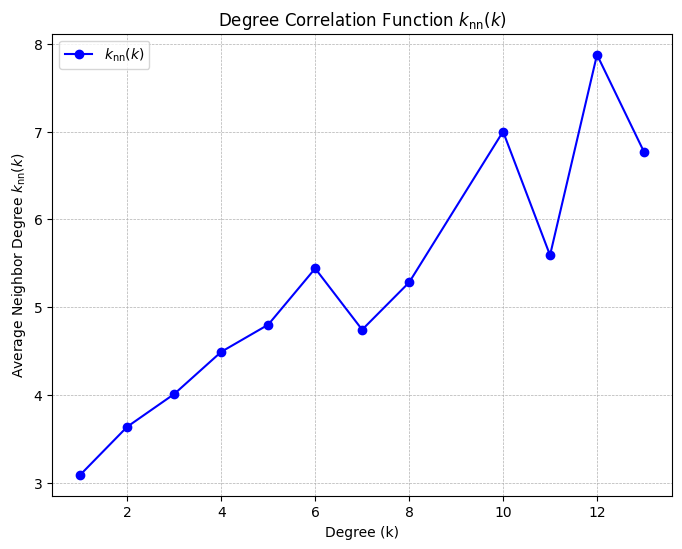

Completed 10000 swaps successfully.
Node degrees: {'Dhaka': 12, 'Biman_Bandar': 12, 'BBSetu_E': 10, 'Chatmohar': 6, 'Natore': 13, 'Santahar': 7, 'Talora': 2, 'Bogura': 4, 'Sonatola': 3, 'Bonar_Para': 5, 'Gaibandha': 4, 'Bamondanga': 2, 'Pirgacha': 2, 'Kaunia': 7, 'Kurigram': 2, 'Rangpur': 3, 'Joypurhat': 6, 'Parbatipur': 8, 'Dinajpur': 6, 'Pirganj': 6, 'Thakurgaon_Road': 6, 'B Sirajul Islam': 3, 'Joydebpur': 8, 'Tangail': 3, 'SH M Monsur Ali': 4, 'Ullapara': 5, 'Ishwardi Bypass': 8, 'Akkelpur': 3, 'Panchbibi': 3, 'Birampur': 4, 'Fulbari': 2, 'Chirirbandar': 4, 'Setabganj': 4, 'Ruhia': 3, 'Kismat': 3, 'Khulna': 2, 'Noapara': 3, 'Jashore': 3, 'Mubarakganj': 2, 'Kotchandpur': 4, 'Darshana_Halt': 3, 'Chuadanga': 4, 'Alamdanga': 2, 'Poradaha': 5, 'Bheramara': 4, 'Pakshi': 2, 'Ishwardi': 6, 'Ahsanganj': 3, 'Saidpur': 2, 'Nilphamari': 2, 'Domar': 2, 'Chilahati': 1, 'Jamtail': 4, 'Boral_Bridge': 4, 'Abdulpur': 7, 'Arani': 4, 'Rajshahi': 11, 'Daulatpur': 2, 'Gobra': 1, 'Borashi': 2, 'Gopalganj'

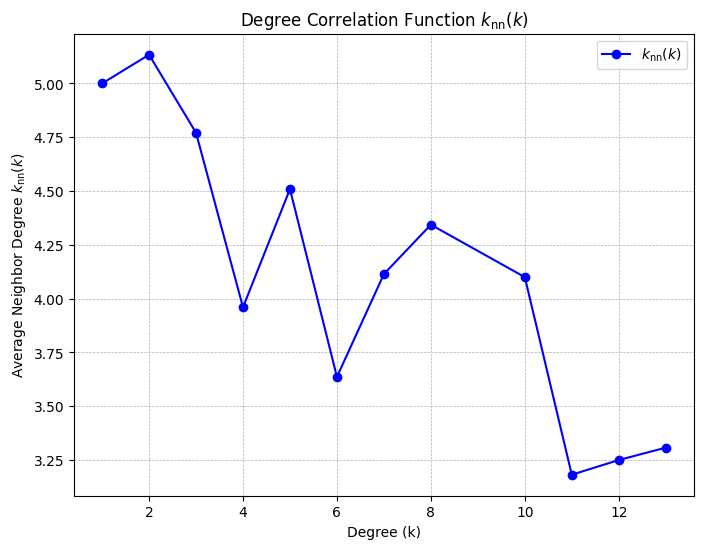

In [37]:
filename = 'train_network.gexf'
G = loadGraph(filename)
graph = G.to_undirected()
degree_distribution = plot_degree_distribution(graph)
plot_giant_component_vs_node_removal(graph, "random", "Random Failures")
communities = detect_communities(graph)
plot_large_communities(graph, communities)
cut_nodes = find_all_cut_nodes_of_size_1(graph)
plot_cut_nodes(graph, cut_nodes)
cut_edges = find_cut_edges(graph)
plot_graph_with_cut_edges(graph, cut_edges)
knn = calculate_knn_with_debug(graph)
plot_knn(knn)
G_randomized = degree_preserving_randomization(graph, 10000)
knn_randomized = calculate_knn_with_debug(G_randomized)
plot_knn(knn_randomized)
